In [1]:
!python3 -m pip install -U matplotlib
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.5 MB/s eta 0:00:0000:010:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.2
    Uninstalling matplotlib-3.7.2:
      Successfully uninstalled matplotlib-3.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.621.222118 requires jupyter-server~=1.16, but you have jupyter-server 2.6.0 which is incompatible.
fitter 1.6.0 requires pandas<3.0.0,>=2.0.3, but you have pandas 2.0.2 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.11.2 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

def train_and_evaluate_models(X_train, y_train, X_val, y_val,test_x):
    """
    Train and evaluate multiple classification models on the given data.

    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_val: Validation features
    - y_val: Validation labels

    Returns:
    - A dictionary containing model names as keys and their accuracies on the validation data as values.
    """
    
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='linear', C=1.0, random_state=42),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(random_state=42)
    }

    accuracies = {}
    pred={}
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_test=model.predict(test_x)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies[model_name] = accuracy
        pred[model_name]=y_pred_test
    print(accuracies)
    return accuracies,pred


In [ ]:
def cross_validation(x_train,y_train,x_valid,y_valid):
    classifiers = [
    ("Random Forest", RandomForestClassifier()),
    ('Logistic Regression',LogisticRegression(max_iter=1000, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=5)),
    ("SVM", SVC(kernel="linear"))]


    
    for model_name, model in classifiers:
        cross_val_scores = cross_val_score(model, x_train, y_train, cv=5)
        print(f"{model_name} Cross-validation scores:", cross_val_scores)
        print(f"{model_name} Mean accuracy:", cross_val_scores.mean())
        print(f"{model_name} Standard deviation:", cross_val_scores.std())
        print("\n")

In [3]:
#function for knn model using and check accuarcy

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def knn(train_x,train_y,valid_x,valid_y):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(train_x, train_y)
    y_pred = model.predict(valid_x)
    accuracy = accuracy_score(valid_y, y_pred)
    print(f'Accuracy using knn: {accuracy:.2f}')

In [4]:
#function for data preprocessing
from sklearn.preprocessing import StandardScaler
def preprocessing(label):
    train=pd.read_csv("train.csv")
    test=pd.read_csv("test.csv")
    valid=pd.read_csv("valid.csv")
    train_x_label_1=train.iloc[:, :-4]
    train_y_label_1=train.iloc[:,-5+label]
    
    valid_x_label_1=train.iloc[:, :-4]
    train_y_label_1=train.iloc[:,-5+label]
    
    test_x_label_1=train.iloc[:, 1:]

    ss = StandardScaler()
    scaled_train_x_label = ss.fit_transform(train_x_label_1)
    scaled_train_x_label
    scaled_test_x_label=ss.fit_transform(test_x_label_1)
    scaled_valid_x_label=ss.fit_transform(valid_x_label_1)
    return scaled_train_x_label,scaled_valid_x_label
    


In [5]:
# scaling function
from sklearn.preprocessing import StandardScaler
def scale(train_x,valid_x,test_x):
    ss = StandardScaler()
    scaled_train_x_label = ss.fit_transform(train_x)
    scaled_train_x_label
    scaled_test_x_label=ss.fit_transform(test_x)
    scaled_valid_x_label=ss.fit_transform(valid_x)
    return scaled_train_x_label,scaled_valid_x_label
    

In [6]:
# pca approch
from sklearn.decomposition import PCA
def pca(train_x,train_y,valid_x,valid_y,test_x):
    pca=PCA(.95, svd_solver='full')
    pca=pca.fit(train_x)
    train_features_pca=pca.transform(train_x)
    valid_features_pca=pca.transform(valid_x)
    test_features_pca=pca.transform(test_x)
    print("accuarcy after pca")
    #     knn(train_features_pca,train_y,valid_features_pca,valid_y)
    return train_features_pca,valid_features_pca,test_features_pca
    

In [7]:
# Write predicted values to a CSV file.
import pandas as pd

def write_predictions_to_csv(predictions, output_file):

    
    # Create a DataFrame with a column for predictions
    df = pd.DataFrame({'Predicted_Label': predictions})
    
    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)  # Set index=False to exclude row numbers


In [8]:
train=pd.read_csv("/kaggle/input/grp-project-ml/train.csv")
test=pd.read_csv("/kaggle/input/grp-project-ml/test.csv")
valid=pd.read_csv("/kaggle/input/grp-project-ml/valid.csv")

In [9]:
train.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6


In [10]:
test.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,0.153160,0.112289,0.040273,0.006054,-0.082956,0.010444,0.045114,-0.165139,0.102368,...,0.106029,0.062651,0.038253,-0.156998,-0.048017,0.068254,0.047534,0.160371,0.076477,0.093875
1,2,0.067325,0.076545,0.105324,0.028182,-0.103412,-0.089486,0.141884,0.046473,0.003030,...,-0.005264,0.084812,0.160644,-0.075722,-0.054241,0.049832,0.003579,-0.017871,-0.059488,-0.102072
2,3,0.010169,0.116066,-0.012554,0.001083,-0.175814,0.014485,0.170519,-0.127064,-0.038071,...,0.037776,0.063297,0.079459,-0.382852,-0.099809,0.013234,-0.020953,-0.021539,-0.044730,-0.123528
3,4,0.162924,-0.003632,0.232407,0.127371,0.021365,-0.093776,0.128503,-0.119398,-0.043160,...,0.065360,0.152132,0.036445,-0.046519,-0.153139,0.018204,-0.112533,0.095837,0.091668,-0.111523
4,5,-0.030397,0.020162,-0.048599,0.008827,-0.118521,-0.023770,0.018864,-0.026707,-0.020216,...,-0.008395,0.060719,0.021331,-0.154071,-0.027794,0.018429,0.019384,-0.028690,0.020569,-0.052916


In [11]:
valid.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,-0.029340,-0.026572,0.006227,-0.157240,-0.126458,-0.016806,0.011338,-0.051527,-0.051583,-0.027086,...,0.047600,-0.012270,0.043381,-0.022228,0.046098,0.049717,45,NaN,1,6
1,0.092717,0.067198,0.061320,-0.201336,-0.252250,0.006088,0.011854,-0.277564,0.029302,-0.034736,...,0.093419,0.139447,0.047001,-0.042325,0.031232,0.053672,45,NaN,1,6
2,-0.014250,0.072214,-0.053749,-0.016300,-0.142032,0.077692,0.121140,-0.098746,-0.009898,-0.006798,...,-0.023516,-0.063519,0.042752,-0.011081,0.161032,0.053349,45,NaN,1,6
3,-0.056856,0.014097,-0.029236,-0.150747,-0.078507,-0.040386,0.001480,-0.070090,0.025345,-0.039243,...,0.061066,-0.046192,0.059160,0.024137,0.062927,0.037316,45,NaN,1,6
4,-0.046353,0.054917,-0.081850,0.161505,0.054402,-0.138667,0.278676,-0.032590,-0.008799,-0.028483,...,-0.058222,0.012435,-0.009338,0.060546,0.056563,-0.178438,45,NaN,1,6


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28520 entries, 0 to 28519
Columns: 772 entries, feature_1 to label_4
dtypes: float64(769), int64(3)
memory usage: 168.0 MB


In [13]:
train.dtypes

feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

In [14]:
#Check is there any NaN values

train.isnull().sum()

#check is there any duplicates in the data set
train.drop_duplicates()


#only label_2 has NaN values


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.071810,0.068413,-0.022749,0.086143,0.026361,-0.028817,0.199237,-0.287368,-0.059560,-0.043694,...,0.004646,0.123011,0.043040,-0.042152,0.026225,0.072623,45,NaN,1,6
1,0.030930,0.024088,0.057811,-0.230877,-0.146281,0.102807,0.128767,-0.146269,0.053893,0.055378,...,0.077742,0.081691,-0.004778,0.171727,-0.026027,0.171089,45,NaN,1,6
2,-0.044019,-0.004626,-0.029383,-0.165376,-0.026611,-0.028142,-0.009649,-0.082088,0.018933,0.006830,...,0.076249,-0.046272,0.027831,0.028096,0.030994,0.009709,45,NaN,1,6
3,-0.086241,0.129585,-0.013893,0.089885,-0.100300,-0.035184,0.240980,-0.128362,-0.072328,-0.019385,...,0.006934,-0.049213,0.078852,0.088323,0.168815,-0.049188,45,NaN,1,6
4,0.126416,0.088338,0.088307,0.020371,0.174417,-0.030560,0.181163,-0.009382,0.085396,0.015823,...,-0.028883,0.110844,-0.041875,0.025686,0.003534,-0.104945,45,NaN,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28515,-0.019767,0.063323,-0.053509,-0.199206,-0.077987,-0.024195,-0.029862,-0.129485,0.078477,0.069051,...,0.123746,-0.045124,-0.061726,0.028198,0.024888,0.039199,39,29.0,1,6
28516,0.066528,0.029456,0.021956,0.002894,-0.034516,0.020519,0.099444,-0.080402,0.071025,-0.031894,...,-0.056049,0.030960,0.037558,-0.031431,-0.012858,-0.005033,39,29.0,1,6
28517,-0.058156,-0.032875,0.005609,-0.006116,-0.152900,-0.043931,-0.025087,-0.008506,0.030026,-0.012636,...,0.057833,-0.071774,-0.086787,0.074992,0.116150,-0.042498,39,29.0,1,6
28518,0.105208,0.065665,0.026605,0.091844,-0.052247,-0.071054,0.225280,-0.136209,0.002890,0.018416,...,-0.153156,0.046712,-0.045123,-0.038928,0.008563,-0.059361,39,29.0,1,6


In [15]:
#cheack is there any string values, if there any string values we can encode the values.
contains_strings=train.applymap(lambda x: isinstance(x, str))
if contains_strings.any().any():
    print("There are string values in the DataFrame columns.")
else:
    print("There are no string values in the DataFrame columns.")

There are no string values in the DataFrame columns.


label 1 

In [16]:
train_x_label_1=train.iloc[:, :-4]
train_y_label_1=train.iloc[:,-1:]
valid_x_label_1=valid.iloc[:, :-4]
valid_y_label_1=valid.iloc[:,-1:]
test_x_label_1=test.iloc[:, 1:]
train_x_label_1
print(valid_y_label_1,train_y_label_1)

     label_4
0          6
1          6
2          6
3          6
4          6
..       ...
745        6
746        6
747        6
748        6
749        6

[750 rows x 1 columns]        label_4
0            6
1            6
2            6
3            6
4            6
...        ...
28515        6
28516        6
28517        6
28518        6
28519        6

[28520 rows x 1 columns]


In [17]:
# knn(train_x_label_1,train_y_label_1,valid_x_label_1,valid_y_label_1)
# Accuracy using knn: 0.77

/tmp/ipykernel_29/4264689177.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_x, train_y)


Accuracy using knn: 0.77


In [71]:
# train_and_evaluate_models(train_x_label_1,train_y_label_1,valid_x_label_1,valid_y_label_1)
# {'Random Forest': 0.7733333333333333, 'SVM': 0.9426666666666667, 'Logistic Regression': 0.9226666666666666, 'K-Nearest Neighbors': 0.9413333333333334, 'Naive Bayes': 0.39066666666666666, 'Decision Tree': 0.664}
# {'Random Forest': 0.7733333333333333,
#  'SVM': 0.9426666666666667,
#  'Logistic Regression': 0.9226666666666666,
#  'K-Nearest Neighbors': 0.9413333333333334,
#  'Naive Bayes': 0.39066666666666666,
#  'Decision Tree': 0.664}

/tmp/ipykernel_32/3931122333.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._f

{'Random Forest': 0.7733333333333333, 'SVM': 0.9426666666666667, 'Logistic Regression': 0.9226666666666666, 'K-Nearest Neighbors': 0.9413333333333334, 'Naive Bayes': 0.39066666666666666, 'Decision Tree': 0.664}


{'Random Forest': 0.7733333333333333,
 'SVM': 0.9426666666666667,
 'Logistic Regression': 0.9226666666666666,
 'K-Nearest Neighbors': 0.9413333333333334,
 'Naive Bayes': 0.39066666666666666,
 'Decision Tree': 0.664}

In [18]:
#check duplicates
train_features_T = train_x_label_1.T
train_features_T.shape
print(train_features_T.duplicated().sum())

0


In [19]:
train_y_label_1

,label_4
0,6
1,6
2,6
3,6
4,6
...,...
28515,6
28516,6
28517,6
28518,6


In [20]:
print(train_y_label_1['label_4'])

0        6
1        6
2        6
3        6
4        6
        ..
28515    6
28516    6
28517    6
28518    6
28519    6
Name: label_4, Length: 28520, dtype: int64


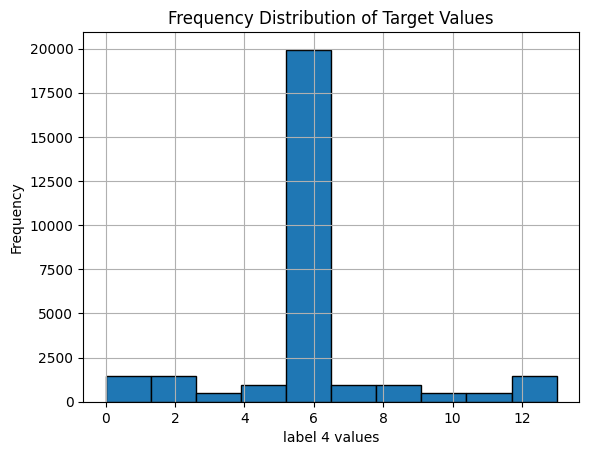

In [21]:
import matplotlib.pyplot as plt
plt.hist(train_y_label_1['label_4'], bins=10, edgecolor='k')  # Adjust the number of bins as needed
plt.xlabel('label 4 values')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Target Values')
plt.grid(True)

# Show the plot
plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


from imblearn.over_sampling import RandomOverSampler
# # Apply SMOTE to oversample the minority classes
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


over_sampler = RandomOverSampler(sampling_strategy='auto')
train_x_label_1, train_y_label_1= over_sampler.fit_resample(train_x_label_1,train_y_label_1)
cross_validation(train_x_label_1, train_y_label_1,valid_x_label_1,validation_y_label_1)
# train_and_evaluate_models(train_x_label_1,train_y_label_1,valid_x_label_1,valid_y_label_1)


# {'Random Forest': 0.7946666666666666,
#  'SVM': 0.9106666666666666,
#  'Logistic Regression': 0.8773333333333333,
#  'K-Nearest Neighbors': 0.9253333333333333,
#  'Naive Bayes': 0.336,
#  'Decision Tree': 0.6893333333333334}

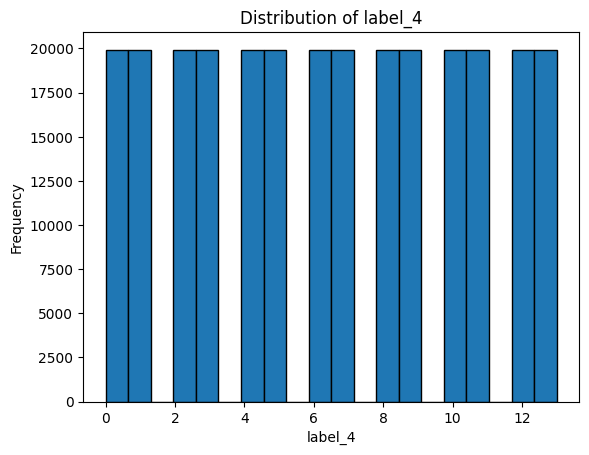

In [25]:
# after sampling
# Calculate label correlations
column_to_visualize = 'label_4'

# Create a histogram
plt.hist(train_y_label_1[column_to_visualize], bins=20, edgecolor='k')
plt.xlabel(column_to_visualize)
plt.ylabel('Frequency')
plt.title(f'Distribution of {column_to_visualize}')
plt.show()
frequency_counts = train_y_label_1['label_4'].value_counts()

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_train_x_label_1 = ss.fit_transform(train_x_label_1)
scaled_train_x_label_1
scaled_test_x_label_1=ss.fit_transform(test_x_label_1)
scaled_valid_x_label_1=ss.fit_transform(valid_x_label_1)

In [ ]:
from sklearn.preprocessing import RobustScaler
ss = RobustScaler()
scaled_train_x_label_1 = ss.fit_transform(train_x_label_1)
scaled_train_x_label_1
scaled_test_x_label_1=ss.transform(test_x_label_1)
scaled_valid_x_label_1=ss.transform(valid_x_label_1)
acc,pred=train_and_evaluate_models(scaled_train_x_label_1,train_y_label_1,scaled_valid_x_label_1,valid_y_label_1,scaled_test_x_label_1)
print("accuracy using RobustScaler.")

In [27]:
scaled_train_x_label_1_df = pd.DataFrame(scaled_train_x_label_1,columns = train_x_label_1.columns)
scaled_train_x_label_1_df.describe()
scaled_test_x_label_1_df=pd.DataFrame(scaled_test_x_label_1,columns=test_x_label_1.columns)
scaled_valid_x_label_1_df=pd.DataFrame(scaled_valid_x_label_1,columns=valid_x_label_1.columns)

print("after scaling")
train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1,valid_y_label_1,scaled_test_x_label_1)


after scaling


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


{'SVM': 0.8693333333333333, 'K-Nearest Neighbors': 0.8893333333333333}


{'SVM': 0.8693333333333333, 'K-Nearest Neighbors': 0.8893333333333333}

In [28]:
scaled_train_x_label_1_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
count,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,...,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05,2.791320e+05
mean,4.963810e-18,-3.734440e-16,7.035883e-17,-9.316690e-18,1.537508e-16,2.020144e-16,-2.255861e-16,3.371318e-16,5.595105e-17,1.007526e-16,...,-2.158621e-17,-3.993704e-16,-1.124621e-16,4.416519e-17,6.855149e-17,-6.389315e-17,-7.229344e-18,-2.102110e-16,-2.875446e-16,5.131816e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-3.482136e+00,-4.179962e+00,-3.855177e+00,-3.626631e+00,-5.421796e+00,-4.661926e+00,-3.727990e+00,-4.153726e+00,-4.298519e+00,-4.065368e+00,...,-4.018864e+00,-4.167632e+00,-3.967602e+00,-3.328739e+00,-3.939517e+00,-3.839106e+00,-4.498126e+00,-4.032240e+00,-3.952883e+00,-3.486228e+00
25%,-6.816681e-01,-7.121948e-01,-7.037727e-01,-6.187110e-01,-6.224115e-01,-5.923728e-01,-7.144985e-01,-6.638905e-01,-6.585989e-01,-5.955297e-01,...,-6.328951e-01,-6.764257e-01,-6.565058e-01,-6.909181e-01,-6.590901e-01,-6.530350e-01,-6.115831e-01,-6.386974e-01,-6.672059e-01,-6.294410e-01
50%,-8.857443e-02,2.317232e-02,-2.448436e-02,6.178642e-02,3.750680e-02,4.127083e-02,-1.174154e-02,4.002282e-02,-8.027803e-02,1.951656e-04,...,5.214540e-02,-5.210615e-03,1.553360e-02,-4.610830e-02,-5.910656e-03,3.172875e-02,7.639025e-02,-8.030120e-02,-2.360569e-02,5.800327e-02
75%,6.473440e-01,7.051875e-01,6.575386e-01,6.904842e-01,6.450215e-01,6.526308e-01,6.620494e-01,6.825894e-01,6.385042e-01,6.551066e-01,...,6.904523e-01,6.740049e-01,6.553841e-01,6.677305e-01,6.588630e-01,6.884907e-01,6.795578e-01,5.569511e-01,6.499665e-01,6.452864e-01
max,4.036091e+00,4.159448e+00,4.200997e+00,3.362530e+00,3.796616e+00,4.684755e+00,3.570910e+00,3.822967e+00,4.312167e+00,3.493066e+00,...,3.412076e+00,3.550484e+00,5.218218e+00,3.957433e+00,4.200349e+00,3.668149e+00,4.673484e+00,4.920151e+00,4.693184e+00,3.571244e+00


In [33]:
print(train_y_label_1)

        label_4
0             6
1             6
2             6
3             6
4             6
...         ...
279127       13
279128       13
279129       13
279130       13
279131       13

[279132 rows x 1 columns]


In [34]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
classifier = LogisticRegression(solver='lbfgs')

# Train the classifier on the training data
classifier.fit(scaled_train_x_label_1_df,train_y_label_1)

# Classify the testing data
y_pred = classifier.predict(scaled_valid_x_label_1_df)
print(y_pred)
y_pred_test=classifier.predict(scaled_test_x_label_1_df)
# Print the classification accuracy



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_29/3124345112.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  accuracy = np.mean(y_pred == valid_y_label_1)


[ 6 12  6  6  6  6  6  6  6  6  6  6  6  6  0  6  6  7  6  6  6  9  6  6
  6  6  6  6  6  6  6 12 13 13 13 13 13 13 13 13 13 13  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  9  6  6  6  6 10  6  6 12  6  6  6 11 12  6  6
  6 11  9  6  5  5  5  5  5  5  5  5  5  5  5  1  1  1  1  1  1  1  1  1
  1  1  6  6  6  6  6  6  6  6  6  6  6  6  6 12  6 12  4 13  6  2  2  2
  2  2  2  2  2  3  6  6  6  2  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  7  6  6  6  6  6  6  6 12 12  6  6  4  6  6  6  6
  6  4  6  6  6  6  6  3  6  6  6  5  6  6  6  5  6  6  6  6  6  6  6  6
  6  6  0  0  6  2  6  6  6  3  6  6  6  2  6  5  6  6  6  4  6  6  6  6
  6  6  6  6  6 12  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7  6  7  7
  7  6  6  6  6  6  6  6  6  6  6  0  6  6  2  6 10  6  9  6  6  6  6  6
  2  6  6  6 11  6  9  6  3  3  3  3  3  3  3  3  5  6  6  6  8  6  6  6
  6  6  2  6  6 13  2  6  6  6  6  6  6  6  6  2 10  6  6  6  6  6  6  6
  6  3 11 11  6  6  6  0  6  6  6 12  8  6  6  3  9

ValueError: Unable to coerce to Series, length must be 1: given 750

In [41]:
# write to the csv file 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(valid_y_label_1, y_pred)
print(accuracy)

write_predictions_to_csv(y_pred_test, "/kaggle/working/label_4_test_abraha1m_classifier_predictions_with_hyperameter_tuning.csv")

0.8053333333333333


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



# model = RandomForestClassifier(n_estimators=100)
# model.fit(scaled_train_x_label_1, train_y_label_1)
# y_pred = model.predict(scaled_valid_x_label_1_df)
# from sklearn.metrics import accuracy_score

# # Calculate the accuracy
# accuracy = accuracy_score(valid_y_label_1, y_pred)
# print(f'Accuracy: {accuracy:.2f}')
# Accuracy: 0.77 random forest

In [45]:
# correlated_features = set()
# correlation_matrix = scaled_train_x_label_1_df.corr()
# # print(correlation_matrix)
# for i in range(len(correlation_matrix .columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > 0.5:
#             colname = correlation_matrix.columns[i]
#             correlated_features.add(colname)
# # print(correlated_features)            
# scaled_train_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
# scaled_valid_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
# scaled_test_x_label_1_df.drop(labels=correlated_features, axis=1, inplace=True)
# # print(scaled_train_x_label_1_df.describe(),scaled_valid_x_label_1_df.describe())
# # knn(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)
# # train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1,valid_y_label_1)

#Accuracy using knn: 0.76

In [46]:
# train_and_evaluate_models(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1)
# print("Before pca accuaracy")
# {'Random Forest': 0.76, 
#  'SVM': 0.9133333333333333, 
#  'Logistic Regression': 0.9266666666666666, 
#  'K-Nearest Neighbors': 0.9133333333333333,
#  'Naive Bayes': 0.432, 
#  'Decision Tree': 0.668}
# Before pca accuaracy

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
# Create a SelectKBest instance with a scoring function (e.g., chi-squared)
selector = SelectKBest(score_func=f_classif, k=400)  # Select the top 2 features

# Fit and transform your data to select the best k features
scaled_train_x_label_1_df = selector.fit_transform(scaled_train_x_label_1_df, train_y_label_1)
scaled_valid_x_label_1_df = selector.transform(scaled_valid_x_label_1_df)
scaled_test_x_label_1_df = selector.transform(scaled_test_x_label_1_df)

In [47]:
scaled_train_x_label_1_df_pca,scaled_valid_x_label_1_df_pca,scaled_test_x_label_1_df_pca=pca(scaled_train_x_label_1_df,train_y_label_1,scaled_valid_x_label_1_df,valid_y_label_1,scaled_test_x_label_1_df)


accuarcy after pca


In [48]:
print("after PCA")
train_and_evaluate_models(scaled_train_x_label_1_df_pca,train_y_label_1,scaled_valid_x_label_1_df_pca,valid_y_label_1)


after PCA


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'SVM': 0.7746666666666666, 'K-Nearest Neighbors': 0.8733333333333333}


{'SVM': 0.7746666666666666, 'K-Nearest Neighbors': 0.8733333333333333}

In [49]:

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000, random_state=42)
model.fit(scaled_train_x_label_1_df_pca,train_y_label_1)
y_pred = model.predict(scaled_valid_x_label_1_df_pca)
y_pred_test=model.predict(scaled_test_x_label_1_df_pca)
y_pred

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([ 6,  6,  6,  6,  6,  6,  6,  6,  6, 11, 12, 12,  6,  6,  3, 10,  6,
       12,  6,  6,  6,  2,  6,  7,  8,  6,  7,  6,  6,  6, 12, 12, 13,  2,
       13, 13, 13, 13, 13, 13, 13,  0,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  6,  4,  9,  6,  6,  6,  6, 10,  6,  6, 12,  6, 12,  6,
       11,  6,  6, 12,  6, 11,  2,  4,  5,  5,  5,  5,  5,  3,  5,  5,  5,
        5,  5,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  6,  6,  6,  6,
        6,  6,  6,  6,  0,  6,  6,  6,  6, 12,  6, 12,  4,  6,  6,  2,  2,
        3,  2,  2,  2,  2,  2,  3, 12, 12,  1,  2,  6,  6,  2,  6,  5,  6,
        6,  6,  6,  6,  6, 12,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,
        6,  6,  6,  4,  6,  6, 12, 12,  9,  6,  6,  6,  6,  6,  6,  6,  4,
        6,  6,  6,  6,  2,  3,  2,  6,  6,  5,  1,  6,  6,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  2,  0,  0,  2,  2,  6,  2,  6,  3,  6,  6,
        6,  2,  7,  2,  6,  6,  6,  4,  6,  6,  6,  6,  6,  6,  6,  6,  6,
       12,  6,  6,  6,  7

In [ ]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7],  # Adjust the range based on your needs
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Perform Grid Search with cross-validation (e.g., 5-fold cross-validation)
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the Grid Search to your training data
grid_search.fit(scaled_train_x_label_1_df_pca, train_y_label_1)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation data
accuracy = best_model.score(scaled_valid_x_label_1_df_pca, valid_y_label_1)
print("Validation Accuracy with Best Model:", accuracy)

# Make predictions on the validation and test sets
y_pred = best_model.predict(scaled_valid_x_label_1_df_pca)
y_pred_test = best_model.predict(scaled_test_x_label_1_df)



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# write to the csv file 
write_predictions_to_csv(y_pred, "label_4_logistic_regression_predictions_with_hyperameter_tuning.csv")

# write to the csv file 
write_predictions_to_csv(y_pred_test, "label_4_test_logistic_regression_predictions_with_hyperameter_tuning.csv")

In [ ]:
y_pred

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# Create the SVC classifier
svc = SVC()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(scaled_train_x_label_1_df_pca,train_y_label_1)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the tuned model on the test dataset
best_svc = grid_search.best_estimator_
accuracy = best_svc.score(scaled_valid_x_label_1_df_pca, valid_y_label_1)
print("Validation Accuracy with Best Model:", accuracy)
y_pred= best_svc.predict(scaled_valid_x_label_1_df_pca)
y_pred_test= best_svc.predict(scaled_test_x_label_1_df_pca)
print(best_svc)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = c

KeyboardInterrupt: 

In [ ]:
write_predictions_to_csv(y_pred, "label_4_svc_with_hyperameter_tuning.csv")
write_predictions_to_csv(y_pred_test, "label_4_test_data_svc_with_hyperameter_tuning.csv")